# METADATA DSA COMPFEST : Water Hardness Prediction

Nama Anggota:
* Mahardi Nalendra Syafa
* Daffa Elgo Santosa
* Annisa Sekartierra Mulyanto

# Library

In [165]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

from sklearn.linear_model import LinearRegression, ElasticNet, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

import optuna

import shap

In [153]:
train = pd.read_csv('/kaggle/input/seleksi-data-science-academy-compfest-16/train.csv')
test = pd.read_csv('/kaggle/input/seleksi-data-science-academy-compfest-16/test.csv')
sample = pd.read_csv('/kaggle/input/seleksi-data-science-academy-compfest-16/sample_submission.csv')

In [162]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
display(train.head(),test.head(),sample.head())

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.2,240.0,90.4
1,1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.5,190.0,130.0
2,2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.0,230.0,160.0
3,3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.0,97.0,41.0
4,4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,1410.0,418.0,950.0,586.0


,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids
0,6400,93.0,15.9,3.6,0.100,11.9,1.40,12.7,208.0,6.5,156.0
1,6401,180.0,34.0,200.0,1.900,8.2,1.30,300.0,1700.0,210.0,860.0
2,6402,95.0,44.0,35.0,0.081,3.3,1.10,28.0,390.0,22.0,240.0
3,6403,110.0,29.0,12.0,0.250,6.0,0.15,23.0,283.0,15.0,190.0
4,6404,179.0,59.0,51.7,0.160,45.0,4.10,64.0,976.0,170.0,430.0


,id,Hardness
0,6400,0
1,6401,0
2,6402,0
3,6403,0
4,6404,0


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6400 non-null   int64  
 1   Alkalinity, total       6400 non-null   float64
 2   Calcium                 6400 non-null   float64
 3   Chloride                6400 non-null   float64
 4   Fluoride                6400 non-null   float64
 5   Magnesium               6400 non-null   float64
 6   Nitrate as N            6400 non-null   float64
 7   Sodium                  6400 non-null   float64
 8   Specific Conductivity   6400 non-null   float64
 9   Sulfate                 6400 non-null   float64
 10  Total Dissolved Solids  6400 non-null   float64
 11  Hardness                6400 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 600.1 KB


In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1601 non-null   int64  
 1   Alkalinity, total       1601 non-null   float64
 2   Calcium                 1601 non-null   float64
 3   Chloride                1601 non-null   float64
 4   Fluoride                1601 non-null   float64
 5   Magnesium               1601 non-null   float64
 6   Nitrate as N            1601 non-null   float64
 7   Sodium                  1601 non-null   float64
 8   Specific Conductivity   1601 non-null   float64
 9   Sulfate                 1601 non-null   float64
 10  Total Dissolved Solids  1601 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 137.7 KB


# EDA

## Deskriptif Statistik

In [185]:
train_no_id = train.drop(columns=['id'])
train_no_id.describe()

,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,167.151047,69.350432,53.213620,0.333625,23.446335,3.382707,62.437731,637.631953,71.645934,409.570669,216.148203
std,83.157803,1052.136452,92.934505,0.452473,325.389503,4.878279,556.891904,597.297274,108.414049,302.958442,161.431526
min,12.000000,0.610000,0.580000,0.049000,0.051000,0.002300,1.300000,40.000000,0.140000,19.580000,2.500000
25%,110.000000,25.000000,11.000000,0.140000,7.300000,0.850000,21.000000,340.000000,13.000000,220.000000,101.000000
50%,153.500000,45.000000,28.000000,0.210000,14.000000,2.000000,35.000000,520.000000,33.000000,320.000000,180.000000
75%,209.000000,72.000000,62.000000,0.382250,25.000000,4.300000,60.000000,800.000000,85.000000,500.000000,281.000000
max,1000.000000,83000.000000,2100.000000,9.000000,26000.000000,106.000000,32000.000000,31400.000000,2000.000000,4100.000000,1901.000000


## Missing Value

In [126]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.

def missing_values_table(train):
        # Total missing values
        mis_val = train.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * train.isnull().sum() / len(train)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(train.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [125]:
missing_values_table(train)
missing_values_table(test)

Your selected dataframe has 12 columns.
There are 0 columns that have missing values.
Your selected dataframe has 11 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


Dari hasil analisis pengecekan *missing value* di atas, diketahui bahwa data tidak memiliki nilai yang hilang baik dalam data train maupun data test. Sehingga proses analisis dapat dilanjutkan. 

## Matrix Correlation

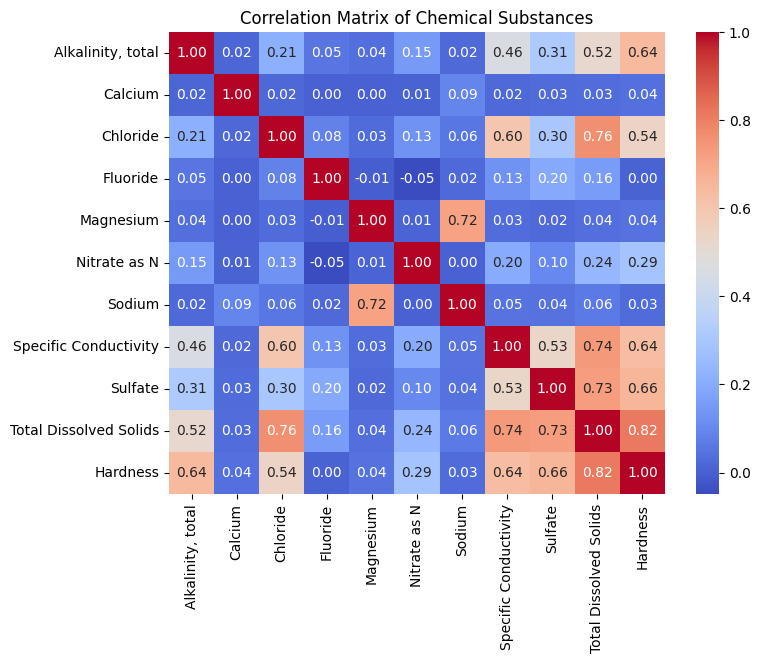

In [163]:
train_no_id = train.drop(columns=['id'])
# Hitung matriks korelasi
correlation_matrix_no_id = train_no_id.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_no_id, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Chemical Substances')
plt.show()

Dari gambar di atas, kita dapat mengetahui variabel yang 

Hasil output di atas adalah sebuah matriks korelasi yang menunjukkan hubungan antara berbagai zat kimia dalam air. Korelasi diukur dari -1 hingga 1, dengan keterangan sebagai berikut:

* Nilai +1 menunjukkan korelasi positif sempurna: saat satu variabel meningkat, variabel lainnya juga meningkat secara proporsional.
* Nilai -1 menunjukkan korelasi negatif sempurna: saat satu variabel meningkat, variabel lainnya menurun secara proporsional.
* Nilai 0 menunjukkan tidak adanya korelasi linear antara dua variabel.

Berdasarkan matriks korelasi tersebut, berikut adalah pasangan variabel yang memiliki korelasi tinggi (di atas 0.7):

* Magnesium dan Sodium: Korelasi sebesar 0.72
* Magnesium dan Hardness: Korelasi sebesar 0.72
* Total Dissolved Solids dan Specific Conductivity: Korelasi sebesar 0.74
* Total Dissolved Solids dan Sulfate: Korelasi sebesar 0.73
* Total Dissolved Solids dan Hardness: Korelasi sebesar 0.82
* Specific Conductivity dan Chloride: Korelasi sebesar 0.60
* Specific Conductivity dan Hardness: Korelasi sebesar 0.64
* Sulfate dan Specific Conductivity: Korelasi sebesar 0.53
* Sulfate dan Hardness: Korelasi sebesar 0.66
Korelasi tinggi ini menunjukkan adanya hubungan yang kuat antara pasangan variabel tersebut, yang berarti perubahan dalam satu variabel kemungkinan besar akan diikuti oleh perubahan dalam variabel lain secara proporsional.

## Pengecekan Outlier dan Distribusi



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

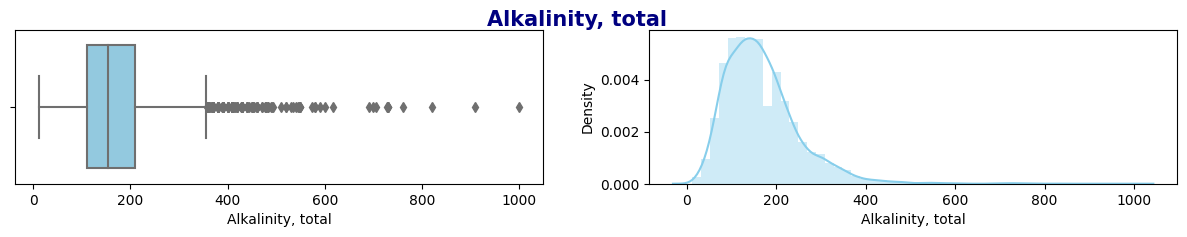

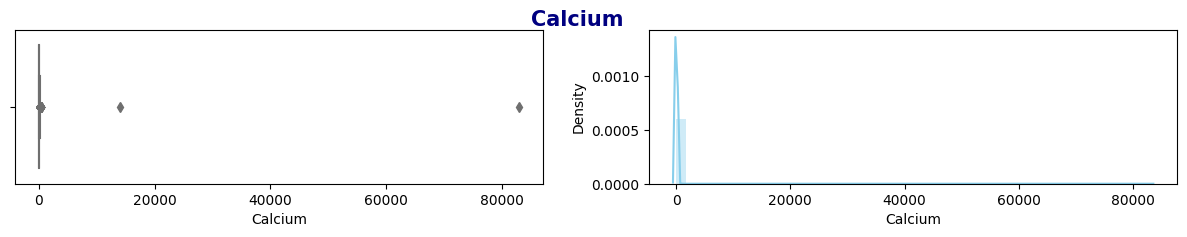

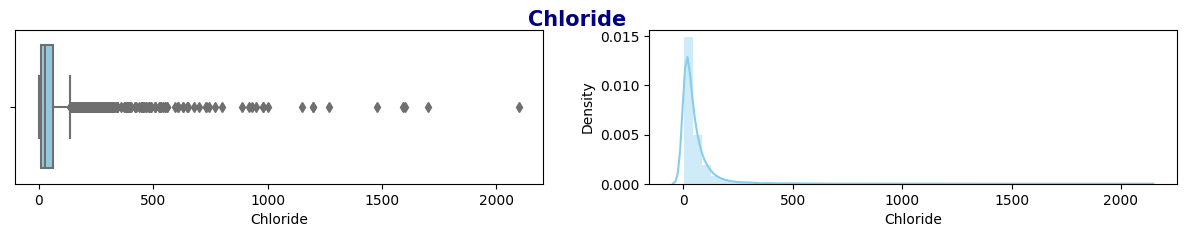

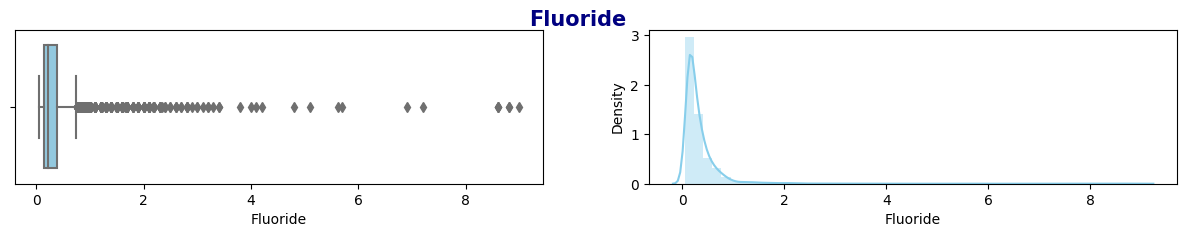

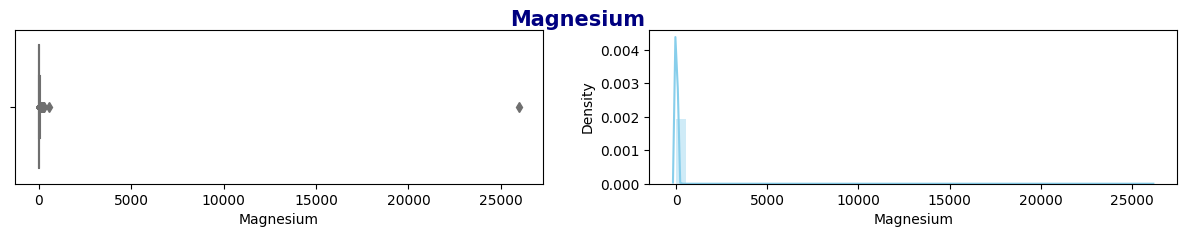

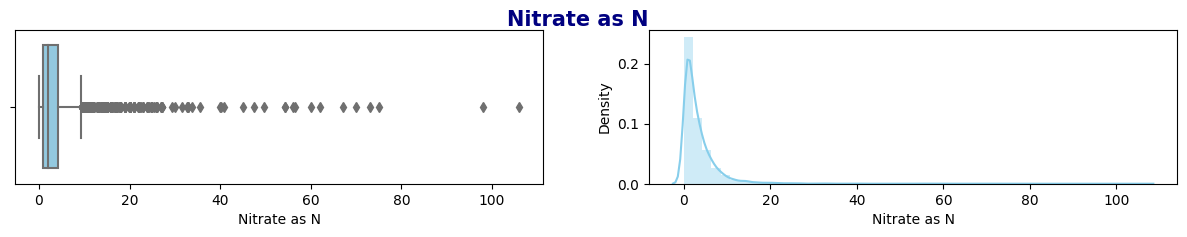

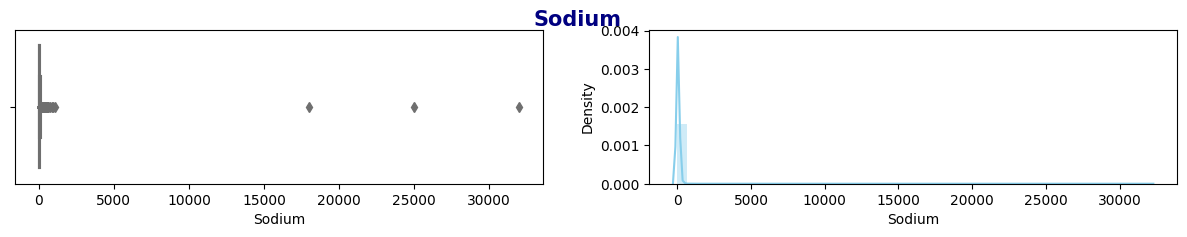

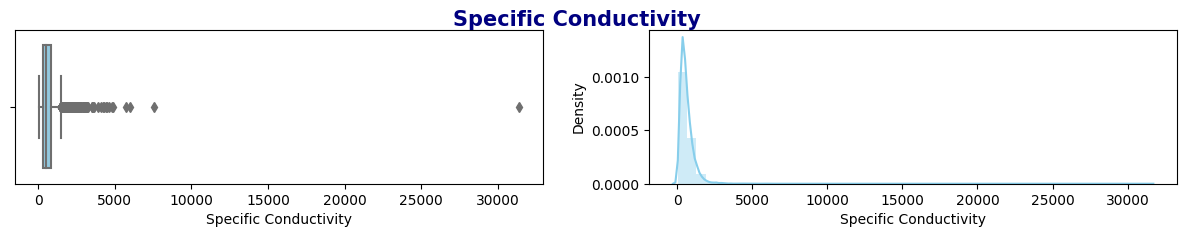

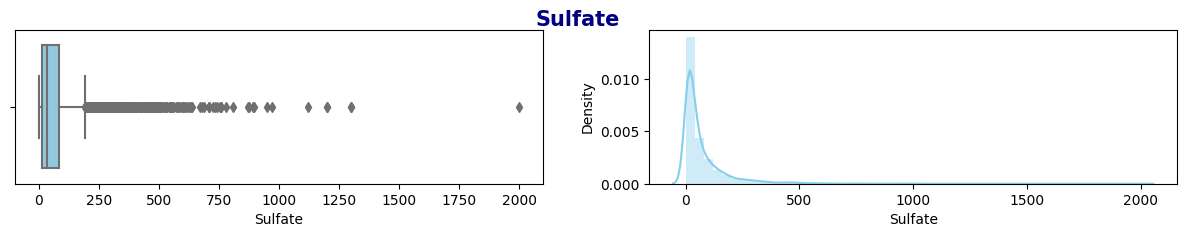

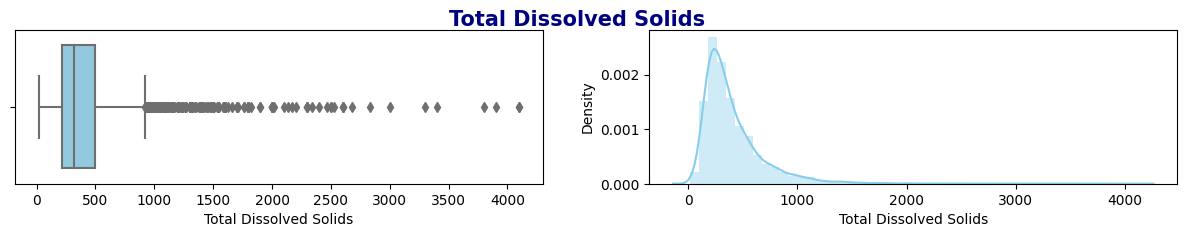

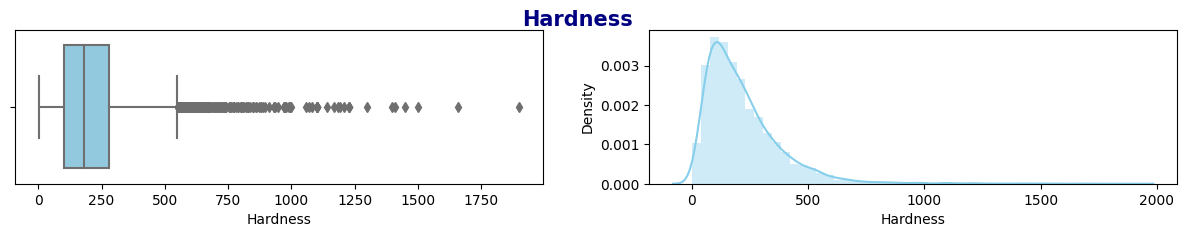

In [166]:
vars = train.columns
for i in range(1, 12) :
    fig, ax = plt.subplots(1, 2, figsize=(15, 2))
    plt.suptitle(vars[i], fontsize=15, fontweight='bold', color='navy')
    # Left Plot
    sns.boxplot(x=vars[i], data=train, ax=ax[0], color = 'skyblue')
    # Right Plot
    sns.distplot(train[vars[i]], ax=ax[1], color = 'skyblue')

Gambar di atas merupakan hasil visualisasi untuk semua variabel yang ada di dalam data train. Jika dilihat dengan menggunakan boxplot, terlihat bahwa semua variabel yang ada memiliki nilai outlier atas. Jika dilihat dengan menggunakan density plot, terlihat bahwa data memiliki sebaran menjurai keatas. 

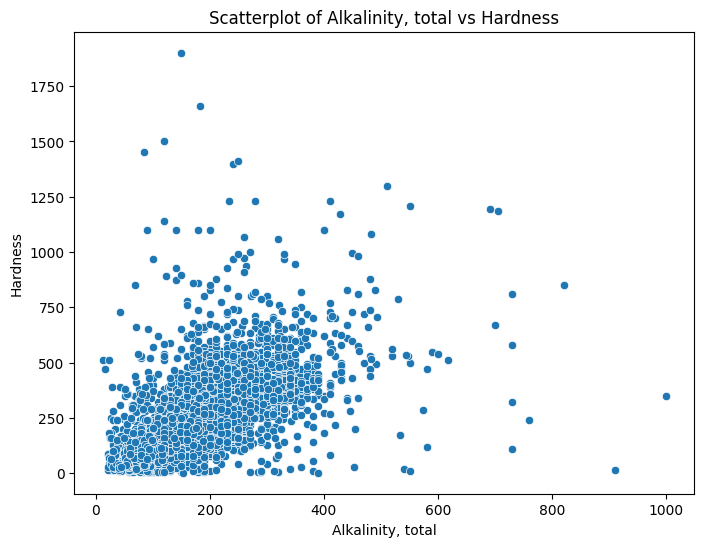

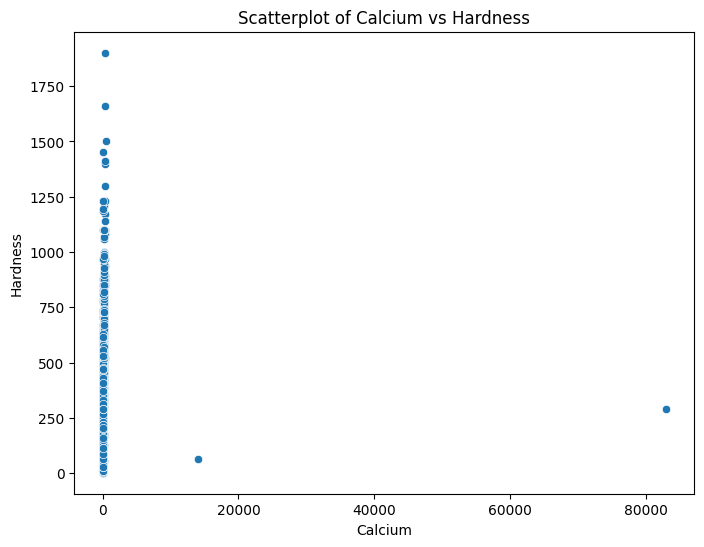

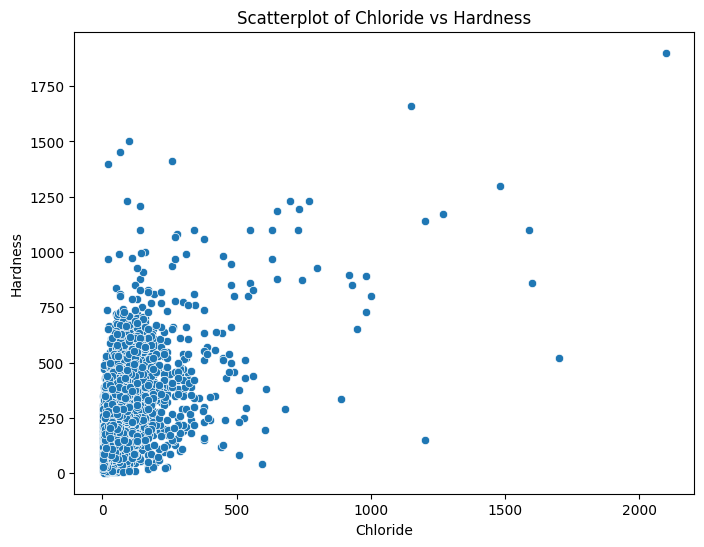

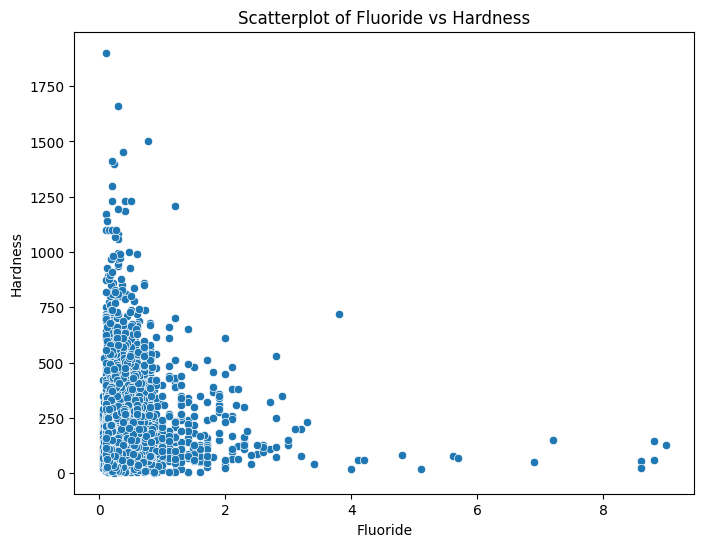

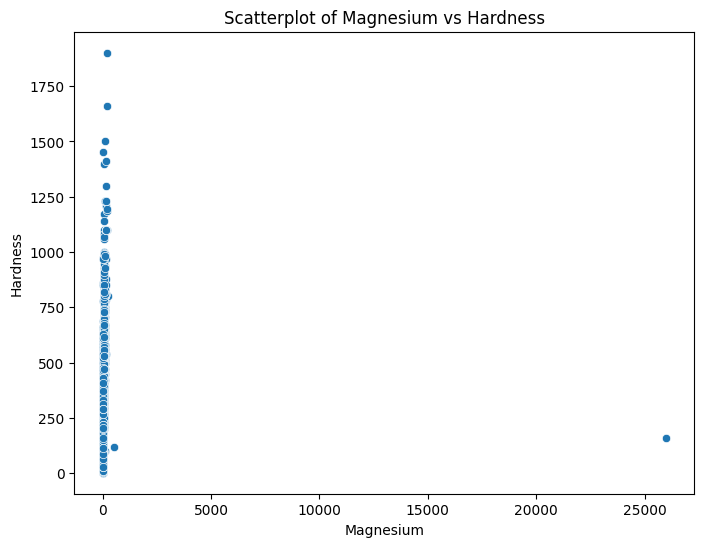

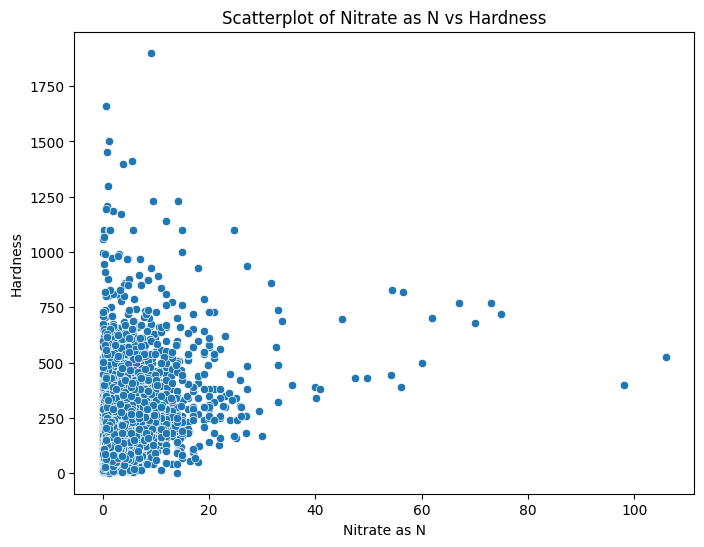

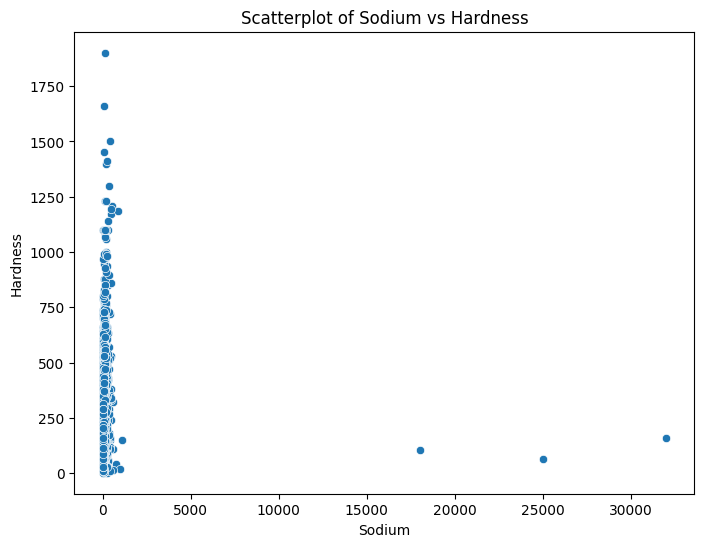

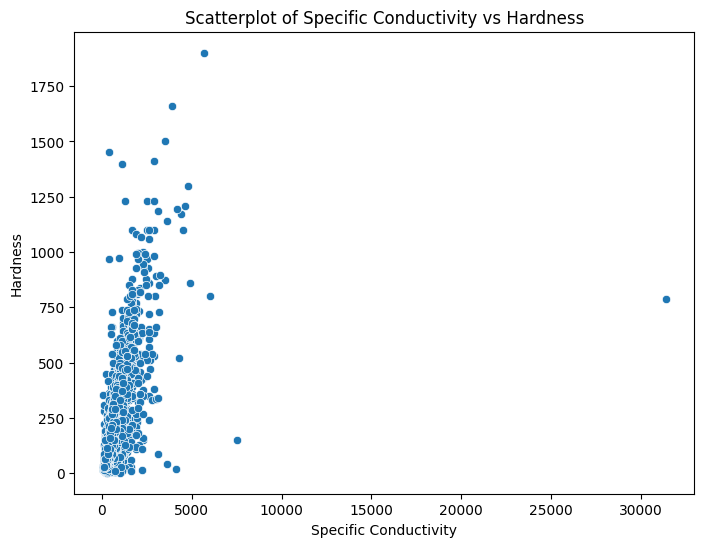

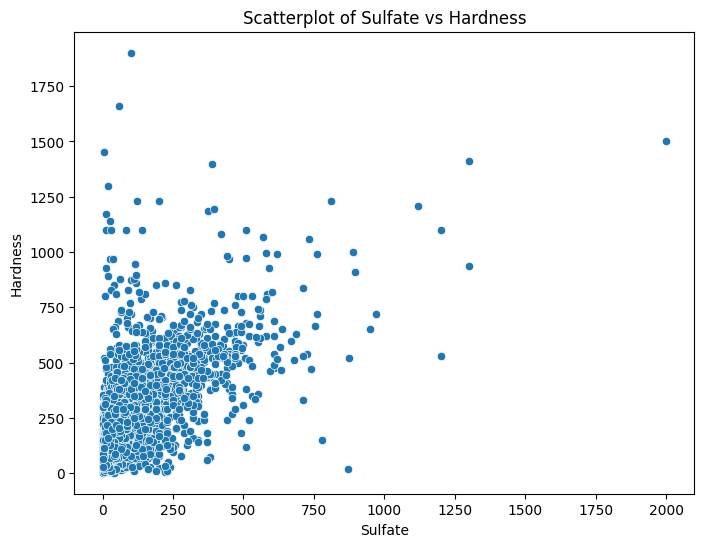

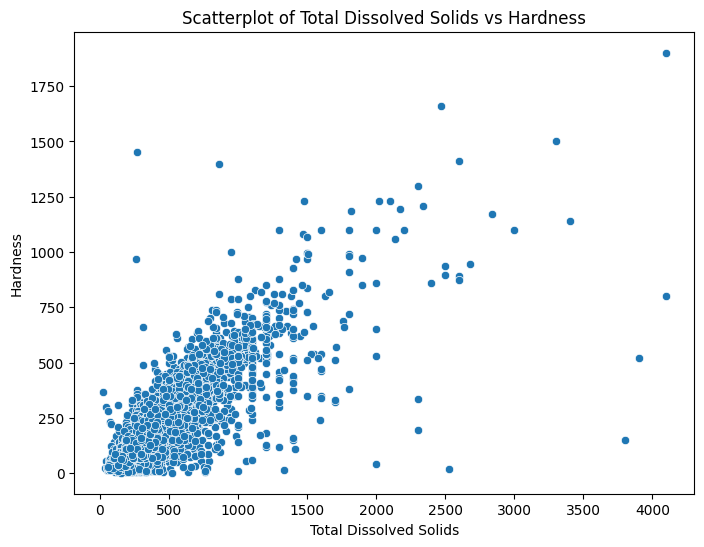

In [184]:
# Daftar kolom selain 'id' dan 'Hardness'
columns = ['Alkalinity, total', 'Calcium', 'Chloride', 'Fluoride', 'Magnesium', 
           'Nitrate as N', 'Sodium', 'Specific Conductivity', 'Sulfate', 'Total Dissolved Solids']

# Membuat scatterplot untuk setiap kolom terhadap 'Hardness'
for col in columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=train[col], y=train['Hardness'])
    plt.title(f'Scatterplot of {col} vs Hardness')
    plt.xlabel(col)
    plt.ylabel('Hardness')
    plt.show()

Berdasarkan scatterplot di atas, kita dapat melihat hubungan linear pada variabel independen terhadap variabel dependen. Dari hasil di atas kita mendapatkan bahwa variabel yang memiliki pola linear terhadap variabel dependen `Hardness` adalah `alkalinity`, `Spesific Conductivity`, `Sulfate`, dan `Total Dissolved Solids`.

# PREPROCESSING (1)

## Hapus Outlier

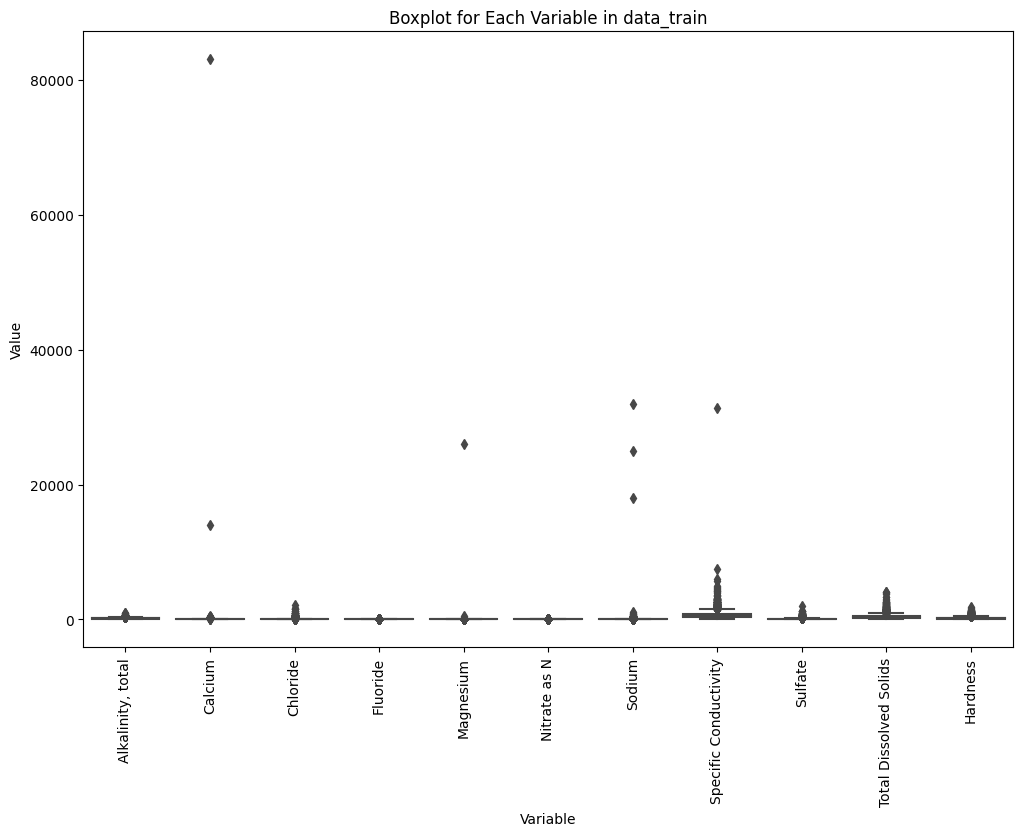

In [189]:
# Create the boxplot
# Melt the DataFrame to have a 'variable' and 'value' column
data_melted = train_no_id.melt(var_name='Variable', value_name='Value')

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Variable', y='Value', data=data_melted)
plt.xticks(rotation=90)
plt.title('Boxplot for Each Variable in data_train')
plt.show()

Pada output di atas, kita dapat mengidentifikasi outlier pada setiap variabel yang ada. Ditemukan *extreme outlier* ditemukan pada vaeiabel `calcium` , `magnesium`, `sodium`, dan `Specific Conductivity`. Kemudian untuk menghapus *extreme outlier* akan ditentukan batas atas nilai sebesar 10000. Dimana nantinya nilai untuk setiap variabel yang melebihi 100000 akan dihapuskan dengan asumsi bahwa nilai tersebut merupakan anomali/kesalahan input data. Data anomali tersebut jika tidak dihapus akan sangat berpengaruh kepada model yang dibuat.  

In [188]:
# Function to detect outliers exceeding 10,000
def detect_outliers_exceeding_10000(df):
    outlier_ids = set()
    for column in df.columns[1:]:  # Skip 'id' column
        outlier_ids.update(df[df[column] > 10000]['id'])
    return list(outlier_ids)

# Detect outliers in the dataset
outlier_ids = detect_outliers_exceeding_10000(train)

# Drop the rows with outliers from the dataset
train = train[~train['id'].isin(outlier_ids)]

## Feature Engineering

Berikut adalah statistika deskriptif kepada data yang sudah dihapus outlier nya

In [91]:
train.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,6395.000000,6395.000000,6395.000000,6395.000000,6395.000000,6395.000000,6395.000000,6395.000000,6395.000000,6395.000000,6395.000000,6395.000000
mean,3199.014543,167.124425,54.216851,53.214866,0.333698,19.370061,3.381163,50.742764,632.946443,71.664813,409.554696,216.096716
std,1847.435285,83.053910,40.739025,92.963398,0.452636,20.213103,4.876083,55.916584,457.131519,108.444239,302.978118,161.315180
min,0.000000,12.000000,0.610000,0.580000,0.049000,0.051000,0.002300,1.300000,40.000000,0.140000,19.580000,2.500000
25%,1599.500000,110.000000,25.000000,11.000000,0.140000,7.300000,0.850000,21.000000,340.000000,13.000000,220.000000,101.000000
50%,3198.000000,154.000000,45.000000,28.000000,0.210000,14.000000,2.000000,35.000000,520.000000,33.000000,320.000000,180.000000
75%,4798.500000,209.000000,72.000000,62.000000,0.384000,25.000000,4.300000,60.000000,800.000000,85.000000,500.000000,281.000000
max,6399.000000,1000.000000,450.000000,2100.000000,9.000000,537.000000,106.000000,1100.000000,7530.000000,2000.000000,4100.000000,1901.000000


dilakukan untuk train dan test untuk variabel dengan skala terbesar.

Kategorisasi `specific conductivity`

In [92]:
train["Conductivity_dis"] = pd.cut(x = train['Specific Conductivity'], bins = [0, 750, 1500, float('inf')], labels=['Very Good', 'Good', 'Bad'], right=True)
train.drop(['Specific Conductivity'], axis = 1, inplace = True)

test["Conductivity_dis"] = pd.cut(x = test['Specific Conductivity'], bins = [0, 750, 1500, float('inf')], labels=['Very Good', 'Good', 'Bad'], right=True)
test.drop(['Specific Conductivity'], axis = 1, inplace = True)


Kategorisasi `Total Dissolved Solids`

In [93]:
train["TDS_dis"] = pd.cut(x = train['Total Dissolved Solids'], bins = [0, 500, 1000, float('inf')], labels=['Very Good', 'Good', 'Bad'], right=True)
train.drop(['Total Dissolved Solids'], axis = 1, inplace = True)

test["TDS_dis"] = pd.cut(x = test['Total Dissolved Solids'], bins = [0, 500, 1000, float('inf')], labels=['Very Good', 'Good', 'Bad'], right=True)
test.drop(['Total Dissolved Solids'], axis = 1, inplace = True)

In [94]:
display(train.head(), test.head())

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Sulfate,Hardness,Conductivity_dis,TDS_dis
0,0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,23.2,90.4,Very Good,Very Good
1,1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,8.5,130.0,Very Good,Very Good
2,2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,25.0,160.0,Very Good,Very Good
3,3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,5.0,41.0,Very Good,Very Good
4,4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,418.0,586.0,Good,Good


,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Sulfate,Conductivity_dis,TDS_dis
0,6400,93.0,15.9,3.6,0.100,11.9,1.40,12.7,6.5,Very Good,Very Good
1,6401,180.0,34.0,200.0,1.900,8.2,1.30,300.0,210.0,Bad,Good
2,6402,95.0,44.0,35.0,0.081,3.3,1.10,28.0,22.0,Very Good,Very Good
3,6403,110.0,29.0,12.0,0.250,6.0,0.15,23.0,15.0,Very Good,Very Good
4,6404,179.0,59.0,51.7,0.160,45.0,4.10,64.0,170.0,Good,Very Good


# Preprocessing (2) - Pipeline

Pada bagian preprocessing (2) akan digunakan `pipeline` yang berisikan transformasi data untuk variabel numerik dan melakukan *encoding* untuk variabel kategorik. Penggunaan metode `pipeline` dapat memastikan bahwa data tidak akan bocor akibat prepocessing data dan meningkatkan efisiensi dengan mengurangi syntax yang redundan. 

## Scalling dan Encoding

In [99]:
# Define numerical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_col = X.select_dtypes(include=['category']).columns.tolist()
#numerical_columns.remove('Total Dissolved Solids')  # Remove 'Total Dissolved Solids' from numerical columns

# Define the numerical transformer
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define the preprocessor with custom transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', OrdinalEncoder(),categorical_col)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Alkalinity, total', 'Calcium', 'Chloride',
                                  'Fluoride', 'Magnesium', 'Nitrate as N',
                                  'Sodium', 'Sulfate']),
                                ('cat', OrdinalEncoder(),
                                 ['Conductivity_dis', 'TDS_dis'])])

Penggunaan MinMaxScaler untuk transformasi data numerik dipilih karena memiliki skala yang berbeda. Alasan menggunakan OrdinalEncoder adalah variabel kategorik memiliki unsur strata/tingkatan.

## Data Splitting

In [100]:
X = train.drop(['id','Hardness'],axis=1)
y = train['Hardness']

# Split the data into train and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [101]:
X_train_pre = preprocessor.fit_transform(X_train)
X_train_pre = pd.DataFrame(X_train_pre, columns=preprocessor.get_feature_names_out())

X_val_pre = preprocessor.transform(X_val)
X_val_pre = pd.DataFrame(X_val_pre, columns=preprocessor.get_feature_names_out())

X_test_pre = preprocessor.transform(test)
X_test_pre = pd.DataFrame(X_test_pre, columns=preprocessor.get_feature_names_out())


# Modeling

## Cross Validation

Cross Validation memastikan bahwa hasil yang didapatkan dari model merepresentasikan sebagian besar kombinasi bagian data. 

In [102]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=0),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=0),
    "Gradient Boosting": GradientBoostingRegressor(random_state=0),
    "AdaBoost": AdaBoostRegressor(random_state=0),
    "XGBoost": XGBRegressor(random_state=0),
    "LightGBM": LGBMRegressor(random_state=0),
    "CatBoost": CatBoostRegressor(verbose=-1,random_state=0),
    "Elastic Net": ElasticNet(),
    "Bayesian Ridge" : BayesianRidge()
}

In [103]:
# Initialize an empty list to store the results
results = []
from sklearn.model_selection import cross_val_score, KFold
# Define the scoring metrics

# Use KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Fit the pipelines and collect their performance using cross-validation
for name, model in models.items():
    try:
        pipeline = Pipeline(steps=[('regressor', model)])
        scores_rmse = cross_val_score(pipeline, X_train_pre, y_train, cv=5, scoring='neg_mean_squared_error')
        scores_mae = cross_val_score(pipeline, X_train_pre, y_train, cv=5, scoring='neg_mean_absolute_error')
        scores_ev = cross_val_score(pipeline, X_train_pre, y_train, cv=5, scoring='explained_variance')
        scores_r2 = cross_val_score(pipeline, X_train_pre, y_train, cv=5, scoring='r2')
        
        results.append({
            "Model": name,
            "R^2 Score Mean": scores_r2.mean(),
            "R^2 Score Std": scores_r2.std(),
            "EV Mean" : scores_ev.mean(),
            "EV std":scores_ev.std(),
            "RMSE Mean": np.sqrt(-scores_rmse).mean(),
            "RMSE Std": np.sqrt(-scores_rmse).std(),
            "MAE Mean": -scores_mae.mean(),
            "MAE Std" : -scores_mae.std()

        })
    except ValueError as e:
        print(f"Model {name} failed with error: {e}")

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


Model LightGBM failed with error: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py", line 1092, in fit
    super().fit(
  File "/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py", line 885, in fit
    self._Booster = train(
  File "/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py", line 255, in train
    b

In [104]:
results_df

,Model,R^2 Score Mean,R^2 Score Std,EV Mean,EV std,RMSE Mean,RMSE Std,MAE Mean,MAE Std
0,Linear Regression,0.904898,0.029809,0.905138,0.029800,49.248880,10.144987,22.302550,-0.858879
1,Random Forest,0.909960,0.023762,0.910200,0.023719,47.933718,8.240430,22.693492,-0.841456
2,Support Vector Regressor,0.538677,0.037718,0.546055,0.034940,109.141967,10.526399,73.994297,-2.525872
3,K-Nearest Neighbors,0.876787,0.026627,0.877125,0.026235,56.302040,8.972715,29.126680,-1.041376
4,Decision Tree,0.770361,0.084566,0.771095,0.083835,75.112319,12.609727,34.215996,-2.001814
5,Gradient Boosting,0.911859,0.028225,0.912030,0.028204,47.344105,9.581071,22.646361,-0.680090
6,AdaBoost,0.805572,0.009755,0.836899,0.014015,70.760314,4.662565,50.877032,-2.604351
7,XGBoost,0.901753,0.029603,0.901937,0.029508,50.152255,9.903868,25.063561,-0.706371
8,Elastic Net,0.445746,0.022827,0.446369,0.022578,119.576047,9.111712,85.732271,-2.394159
9,Bayesian Ridge,0.905002,0.029674,0.905242,0.029664,49.225531,10.120070,22.315605,-0.860451


## Model Terbaik

In [137]:
bestmodel = Pipeline(steps=[
    ('regressor', GradientBoostingRegressor(random_state = 0))
])

In [191]:
# Fit the model
bestmodel.fit(X_train_pre, y_train)

# Make predictions
predictions = bestmodel.predict(X_val_pre)

# Print the model summary and validation MSE
from sklearn.metrics import mean_squared_error
validation_mse = mean_squared_error(y_val, predictions)
val_r2 = r2_score(y_val, predictions)
print(f'Validation RMSE: {np.sqrt(validation_mse):.3f}')
print(f'Validation R^2: {val_r2:.3f}')

Validation RMSE: 49.951
Validation R^2: 0.907


# Tuning Using OPTUNA

Dilakukan hyperparameter tunning sebagai upaya untuk meningkatkan performa model GradienBoostingRegressor dengan mencari hyperparameter terbaik. Teknik yang digunakan adalah dengan OPTUNA. OPTUNA membantu untuk mencari kombinasi hyperparameter yang lebih efisien. Hyperparameter yang akan dilakukan tuning adalah `learning rate` dengan range 0.01 hingga 0.03, `n_estimators` dengan range 50 hingga 300 dan iterasi sebanyak 100 kali. Pemilihan hyperparameter untuk ditunning memperhatikan seberapa penting hyperparameter terhadap model dan memperhatikan sumber daya komputasi. 

In [121]:
# Define objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
    n_estimators = trial.suggest_int('n_estimators', 50, 300)

    # Create the model
    model = GradientBoostingRegressor(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        random_state=0
    )
    
    # Fit the model
    model.fit(X_train_pre, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_val_pre)
    mse = mean_squared_error(y_val, y_pred)
    
    return mse

# Create study and optimize
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

# Train the model with best hyperparameters
best_model_tuning = GradientBoostingRegressor(
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    random_state=0
)

best_model_tuning.fit(X_train_pre, y_train)

# Predict and evaluate the best model
y_pred_best = best_model_tuning.predict(X_val_pre)
mse_best = mean_squared_error(y_val, y_pred_best)
print("RMSE of the best model:", np.sqrt(mse_best))

[I 2024-07-02 12:57:33,708] A new study created in memory with name: no-name-bc04f8b0-ae49-4813-8815-38a8829a62e7
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-07-02 12:57:35,048] Trial 0 finished with value: 3266.499927951726 and parameters: {'learning_rate': 0.014310856898615153, 'n_estimators': 145}. Best is trial 0 with value: 3266.499927951726.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-07-02 12:57:37,151] Trial 1 finished with value: 3111.635064383604 and parameters: {'learning_rate': 0.22772771646294085, 'n_estimators': 236}. Best is trial 1 with value: 3111.635064383604.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

Best hyperparameters: {'learning_rate': 0.056157613236185684, 'n_estimators': 107}
RMSE of the best model: 49.95061707722156


In [122]:
best_model_tuning

GradientBoostingRegressor(learning_rate=0.056157613236185684, n_estimators=107,
                          random_state=0)

In [145]:
bestmodel_tunning = Pipeline(steps=[
    ('regressor', GradientBoostingRegressor(
        learning_rate=0.056157613236185684,
        n_estimators=107,
        random_state=0
    ))
])

In [193]:
# Fit the model
bestmodel_tunning.fit(X_train_pre, y_train)

# Make predictions
predictions = bestmodel_tunning.predict(X_val_pre)

# Print the model summary and validation MSE
from sklearn.metrics import mean_squared_error
validation_mse = mean_squared_error(y_val, predictions)
val_r2 = r2_score(y_val, predictions)
print(f'Validation RMSE: {np.sqrt(validation_mse):.3f}')
print(f'Validation R^2: {val_r2:.3f}')

Validation RMSE: 49.951
Validation R^2: 0.907


Dari hasil pemodelan dengan menggunakan GradientBoostingRegressor yang sudah dilakukan hyperparameter tuning, didapatkan nilai R2 sebesar 0,907 dan RMSE sebesar 49,951.  

# Post Analysis

Post Analysis dilakukan untuk mengetahui karakteristik model yang didapatkan.

## Feature Importance

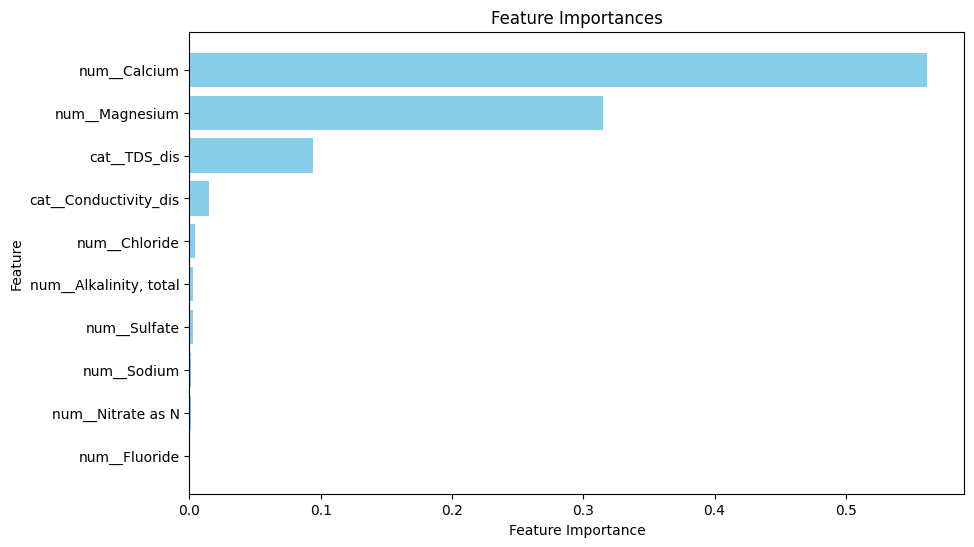

In [190]:
# Akses feature importances dari model regressor
feature_importances = bestmodel_tunning.named_steps['regressor'].feature_importances_

# Akses nama-nama fitur dari X_train
feature_names = X_train_pre.columns

# Buat DataFrame untuk feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Urutkan berdasarkan importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Membalik sumbu y untuk descending order
plt.show()

Plot Feature importance di atas menunjukkan bahwa jumlah kalsium memiliki peran yang besar pada model. Begitu juga untuk magnesium dan TDS dis. Ketiga fitur ini merupakan fitur yang paling menentukan besar kecil nilai hardness air.

## SHAP VALUES

Model terbaik yang digunakan adalah GradienBoostingRegressor yang merupakan salah satu pengembangan dari decision trees. Shap Values digunakan sebagai alternatif pendekatan untuk mengetahui fitur yang berpengaruh pada model.

In [196]:
best_model_shap = GradientBoostingRegressor(random_state = 0,learning_rate=0.056157613236185684,n_estimators=107)
best_model_shap.fit(X_train_pre, y_train)

GradientBoostingRegressor(learning_rate=0.056157613236185684, n_estimators=107,
                          random_state=0)

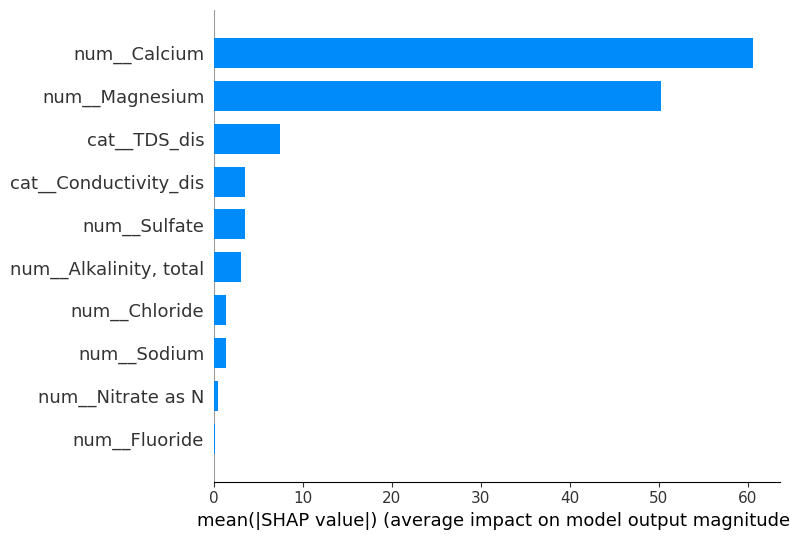

In [197]:
# Menghitung nilai SHAP
explainer = shap.TreeExplainer(best_model_shap,X_train_pre)
shap_values = explainer.shap_values(X_train_pre)

# Memvisualisasikan nilai SHAP
shap.summary_plot(shap_values, X_train_pre, plot_type="bar", feature_names=X_train_pre.columns)

In [198]:
X_train_pre.columns

Index(['num__Alkalinity, total', 'num__Calcium', 'num__Chloride',
       'num__Fluoride', 'num__Magnesium', 'num__Nitrate as N', 'num__Sodium',
       'num__Sulfate', 'cat__Conductivity_dis', 'cat__TDS_dis'],
      dtype='object')

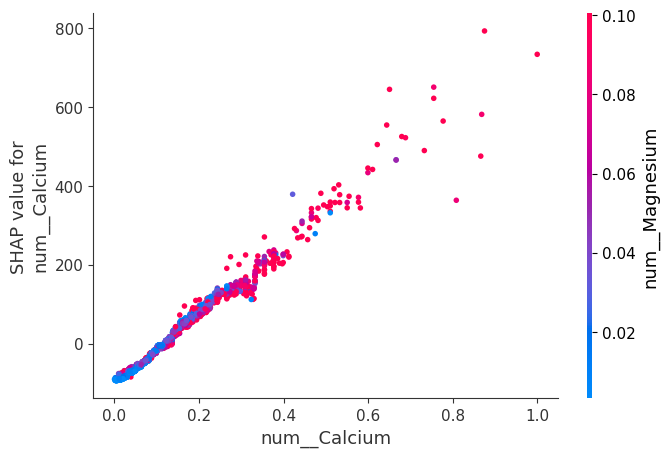

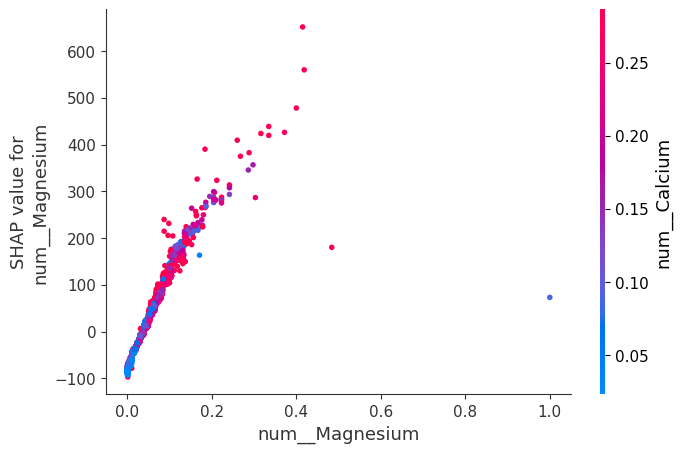

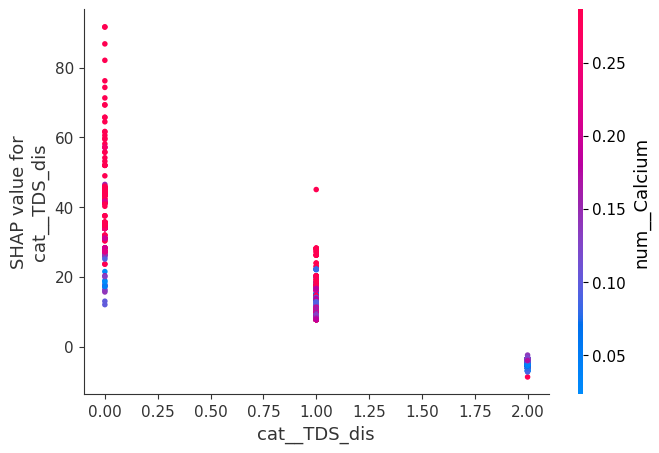

In [199]:
# SHAP Dependence Plot
shap.dependence_plot('num__Calcium', shap_values, X_train_pre)
# SHAP Dependence Plot
shap.dependence_plot('num__Magnesium', shap_values, X_train_pre)
# SHAP Dependence Plot
shap.dependence_plot('cat__TDS_dis', shap_values, X_train_pre)

### Shap Force Plot

Shap Force Plot menguji pada salah satu observasi seberapa pengaruh variabel dalam model untuk memprediksi nilai yang didapatkan

In [200]:
# SIngle prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_train_pre.iloc[0])

In [201]:
# Group Prediction
shap.force_plot(explainer.expected_value, shap_values[:100], X_train_pre.iloc[:100])

In [202]:
X_train_pre.columns

Index(['num__Alkalinity, total', 'num__Calcium', 'num__Chloride',
       'num__Fluoride', 'num__Magnesium', 'num__Nitrate as N', 'num__Sodium',
       'num__Sulfate', 'cat__Conductivity_dis', 'cat__TDS_dis'],
      dtype='object')

# Prediksi Data Test

In [203]:
hasil_test = best_model_tuning.predict(X_test_pre)
hasil_test = pd.DataFrame(hasil_test, columns=['hardness'])
hasil = pd.concat([test['id'],hasil_test], axis = 1)
hasil.head()

,id,hardness
0,6400,99.346257
1,6401,150.822243
2,6402,129.197865
3,6403,92.082506
4,6404,310.290659


In [124]:
hasil.to_csv('submisi.csv',index=False)

# Research Question

## 1. Dalam konteks bisnis dan ilmiah, apakah memprediksi nilai kesadahan (Hardness) air tanah merupakan hal yang mendesak? Jelaskan urgensinya!

Penurunan kualitas air bersih merupakan isu yang krusial yang mempengaruhi berbagai aspek kehidupan, termasuk kesehatan masyarakat, pertumbuhan populasi, dan pembangunan perkotaan Aktivitas industri dan kegiatan manusia sehari-hari meningkatkan risiko pencemaran, yang berdampak signifikan pada ekosistem perairan dan sanitasi, serta akses terhadap air minum yang aman.
	Salah satu parameter utama yang harus diuji untuk menentukan kelayakan air minum adalah kesadahan air, yang dipengaruhi oleh kandungan kalsium dan magnesium. Air dengan tingkat kesadahan tinggi dapat menyebabkan masalah seperti kesulitan berbusa saat mencuci dan pemborosan detergen.
	Kadar kesadahan di atas 500 mg/L dianggap sangat keras dan jika dikonsumsi secara terus-menerus dapat menyebabkan kerusakan ginjal dalam jangka panjang). Oleh karena itu, penting untuk terus memantau kualitas air dan mengambil tindakan yang tepat guna menjaga kesehatan masyarakat dan keberlanjutan lingkungan.
	Dalam konteks bisnis, kesadahan air tanah menjadi indikator kunci dalam menilai kualitas air. Kesadahan yang tinggi dapat mengakibatkan pembentukan kerak, korosi, dan masalah lain yang mempengaruhi efisiensi serta umur panjang peralatan, pipa, dan infrastruktur lainnya. Oleh karena itu, memprediksi tingkat kesadahan sangat penting untuk memastikan bahwa air cocok untuk penggunaan yang dimaksudkan dan untuk mengurangi potensi kerusakan atau biaya pemeliharaan.
	Kesadahan air dipengaruhi oleh kandungan kalsium dan magnesium dalam air. Kadar kesadahan yang tinggi bisa berdampak negatif terhadap kinerja peralatan, seperti mesin-mesin industri dan sistem perpipaan, karena pembentukan kerak dan korosi yang mengganggu aliran dan efisiensi. Ini juga dapat mempersingkat umur operasional infrastruktur, meningkatkan biaya pemeliharaan, dan menurunkan produktivitas.


## 2. Apakah submisi Kaggle Anda mengalami overfit atau underfit? Jika iya, jelaskan mengapa submisi tersebut Anda anggap sebagai overfit atau underfit serta jelaskan bagaimana cara mengatasi hal tersebut! Jika tidak, jelaskan mengapa!

Dari hasil submisi yang telah kami lakukan di Kaggle, kami mendapatkan hasil sebagai berikut

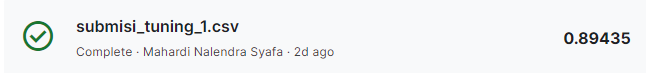

Dari output di atas didapatkan hasil R2 untuk data test sebesar 0,894. Jika kita bandingkan dengan nilai R2 untuk data validation, akan didapatkan nilai R2 sebesar 0.907. Karena nilai R2 untuk data validation dan test tidak terlalu berbeda jauh, hal ini menandakan bahwa model yang dibentuk tidak mengalami *overfit* maupun *underfit*. Hal ini juga menyimpulkan bahwa model yang telah dibangun bagus untuk memprediksikan data ini.

## 3a. Berapa Hardness rata-rata dari sumber air yang memiliki kadar sodium di atas persentil 75 dan memiliki tingkat kebasaan (Alkalinity) di atas rata-rata?

In [147]:
# a. Hardness rata-rata dari sumber air yang memiliki kadar sodium di atas persentil 75 dan memiliki tingkat kebasaan di atas rata-rata
alkalinity_mean = train['Alkalinity, total'].mean()
sodium_75th_percentile = train['Sodium'].quantile(0.75)

filtered_data = train[(train['Sodium'] > sodium_75th_percentile) & (train['Alkalinity, total'] > alkalinity_mean)]
hardness_mean = filtered_data['Hardness'].mean()
hardness_mean

383.0833134765625

Hardness rata-rata dari sumber air yang memiliki kadar sodium di atas persentil 75 dan memiliki tingkat kebasaan (Alkalinity) di atas rata-rata adalah 383.0833134765625

In [148]:
# b. Identifikasi outlier untuk kolom Alkalinity
Q1 = train['Alkalinity, total'].quantile(0.25)
Q3 = train['Alkalinity, total'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = train[(train['Alkalinity, total'] < lower_bound) | (train['Alkalinity, total'] > upper_bound)]

outliers.shape[0], outliers[['id', 'Alkalinity, total']]

(173,
         id  Alkalinity, total
 34      34              400.0
 36      36              360.0
 39      39              617.0
 48      48              360.0
 54      54              370.0
 ...    ...                ...
 6193  6193              410.0
 6204  6204              390.0
 6206  6206              390.0
 6323  6323              461.0
 6363  6363              450.0
 
 [173 rows x 2 columns])

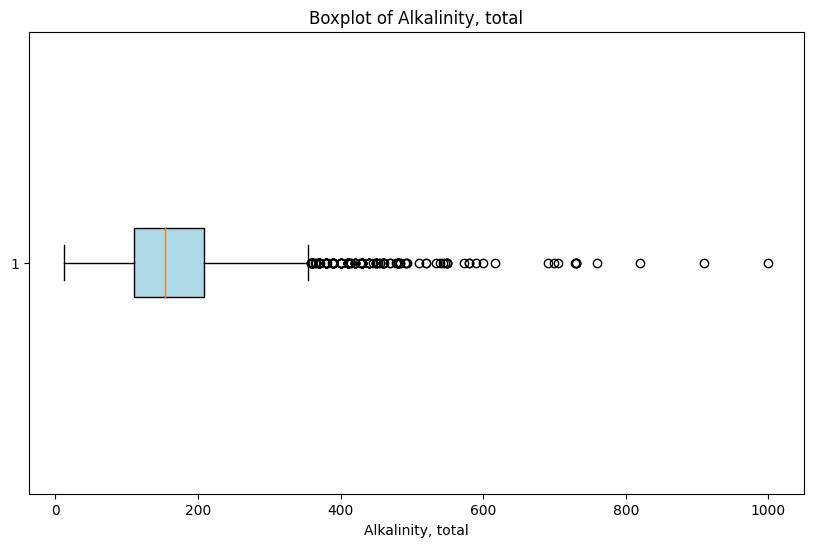

In [149]:
# Create a boxplot for 'Alkalinity, total'
plt.figure(figsize=(10, 6))
plt.boxplot(train['Alkalinity, total'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title('Boxplot of Alkalinity, total')
plt.xlabel('Alkalinity, total')
plt.show()

Berdasarkan output di atas, dapat dilihat bahwa data tingkat kebasaan memiliki nilai outlier pada nilai yang tinggi. Nilai outlier diukur dengan menghitung lower bound dan upperbound dengan rumus 

lower_bound = Q1 - 15 * IQR
upper_bound = Q3 + 1.5 * IQR

Dengan keaterangan
* Q1 : Kuartil Bawah
* Q3 : Kuartil Atas
* IQR : Interquartil : Q3 - Q1

Berdasarkan perhitungan tersebut, didapatkan bahwa data tingkat kebasaan memiliki 173 data outlier. Hal serupa juga bisa dilihat dengan menggunakan boxplot yang telah diberikan di atas. Nilai titik-titik di atas whisker tersebut menandakan nilai outlier pada data. 

## 4. Apakah ada hubungan antara `Specific Conductivity` dan `Hardness`?

In [ ]:
train = pd.read_csv('/kaggle/input/seleksi-data-science-academy-compfest-16/train.csv')

In [158]:
no4 = train[['Specific Conductivity', 'Hardness']]

no4.corr(method='pearson')

,Specific Conductivity,Hardness
Specific Conductivity,1.000000,0.635271
Hardness,0.635271,1.000000


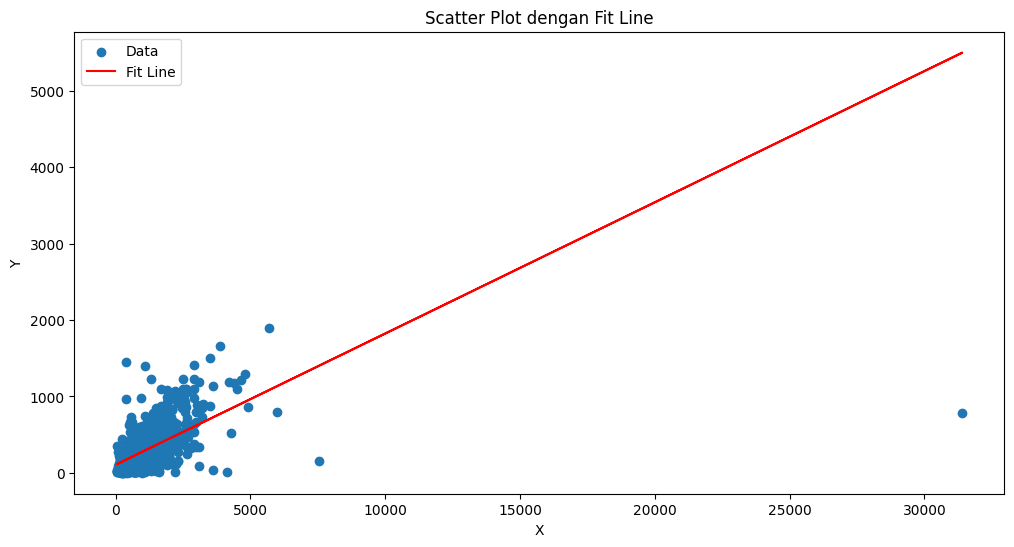

In [160]:
plt.figure(figsize=(12, 6))

plt.scatter(no4['Specific Conductivity'], no4['Hardness'], label='Data')

# Menghitung koefisien regresi linier
m, b = np.polyfit(no4['Specific Conductivity'], no4['Hardness'], 1)

# Menambahkan garis regresi
plt.plot(no4['Specific Conductivity'], m*no4['Specific Conductivity'] + b, color='red', label='Fit Line')

# Menambahkan judul dan label
plt.title('Scatter Plot dengan Fit Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Ada tidaknya hubungan antara dua variabel dapat ditunjukkan dengan melihat nilai korelasi. Didapatkan nilai korelasinya adalah 0.635271 atau sekitar 63,5%. Dengan menggunakan aturan kriteria menurut Sarwono (2006), nilai korelasi tersebut dapat diinterpretasikan bahwa terdapat hubungan yang kuat antara variabel Specific Conductivity dan Hardness

Sarwono, J. (2006). Metode Penelitian Kuantitatif dan Kualitatif. Yogyakarta: Graha Ilmu.

## 5.Dari zat-zat kimia yang diberikan, zat-zat apa saja yang paling mempengaruhi dan paling tidak mempengaruhi Hardness? Jelaskan!

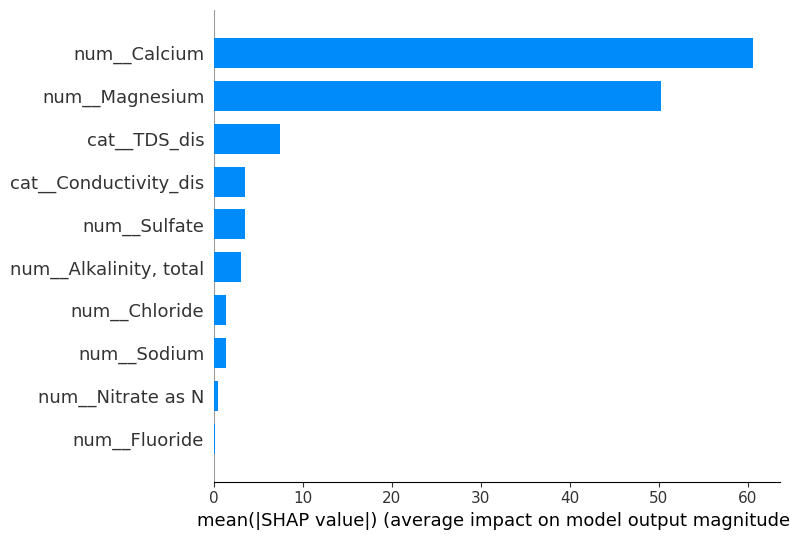

In [204]:
shap.summary_plot(shap_values, X_train_pre, plot_type="bar", feature_names=X_train_pre.columns)

Model machine learning sering kali dianggap sebagai “black box” yang membuat interpretasinya sulit. Untuk memahami fitur utama yang mempengaruhi output model, salah satu teknik yang dapat digunakan adalah metode SHAP. SHAP (Shapley Additive exPlanations) adalah metode yang didasarkan pada  cooperative game theory dan digunakan untuk meningkatkan transparansi dan interpretabilitas model machine learning. Metode ini menjelaskan bagaimana setiap fitur mempengaruhi nilai prediksi model, sehingga membantu dalam mengidentifikasi kontribusi masing-masing fitur terhadap hasil akhir.

Dari barplot yang menunukkan mean dari shape value yaitu rata rata pengaruh pada model, didapatkan 2 fitur yang paling berpengaruh adalah num_calcium dan num_magnesium. Dapat disimpulkan bahwa kadar kalsium dan magnesium berperan penting dalam mempengruhi besar kecilnya hardness pada air. Sedangkan fitur yang paling tidak berpengaruh yaitu num_Fluoride dan num_Nitrate as N. Dapat disimpulkan 2 fitur ini berpengaruh kecil terhadap model prediksi hardness air. 

## 6. Apakah ada pasangan zat kimia yang berkorelasi tinggi? Apakah ada efek dari korelasi tersebut?

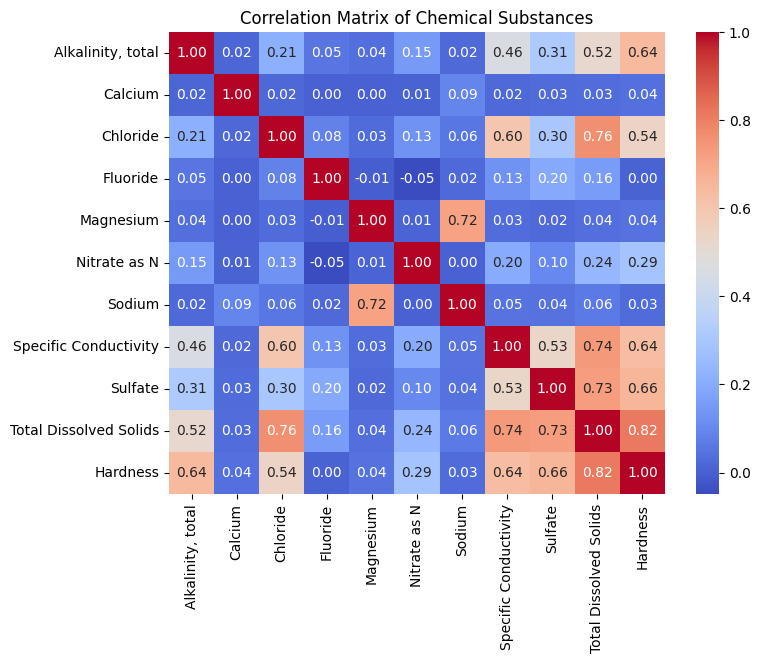

In [161]:
# Hitung matriks korelasi
correlation_matrix_no_id = train_no_id.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_no_id, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Chemical Substances')
plt.show()

Untuk mengetahui manasaja pasangan zat kimia yang memiliki korelasi tinggi, akan ditentukan terlebih dahulu batasan pasangan zat kimia tersebut di katakan tinggi. Dalam penelitian yang menggunakan Pearson's correlation coefficient, nilai 
∣𝑟∣ ≥ 0,7 sering dianggap sebagai korelasi tinggi. Berikut adalah pasangan zat kimia yang memiliki korelasi tinggi. 
* Sodium dan Magnesium

## 7. Jelaskan fitur baru apa saja yang anda peroleh untuk membantu kemampuan model dalam memprediksi ketika anda melalui proses feature engineering

Diskritisasi adalah menjadikan variabel numerik tertentu menjadi beberapa kategori. Diskritisasi memiliki beberapa keuntungan dalam proses pemodelan. Diskritisasi berguna untuk mengurangi kompleksitas model, mengurangi waktu komputasi, dan dapat meningkatkan performa model dalam melakukan prediksi.

Pada kasus ini, kami memilih variabel numerik yaitu Specific Conductivity dan Total Dissolved Solids
Kedua variabel ini dipilih karena keduanya memiliki skala yang terbesar dimana variabel Specific Conductivity bernilai 40-7530 sedangkan 19.58-4100. Pengkategorian variabel numerik ini bedasarkan pengelompokkan dari WHO Guidelines for Drinking-water Quality dengan rincian sebagai berikut:

Specific Conductivity
-	Kurang baik: >1500 μS/cm 
-	Baik: 750-1500 μS/cm 
-	Sangat baik: <750 μS/cm

Total Dissolved Solids 
-	Kurang baik: >1000 mg/L 
-	Baik: 500-1000 mg/L 
-	Sangat baik: <500 mg/L

(Kustanto). (A. Kustanto, “Water quality in Indonesia: The role of socioeconomic indicators,” J. Ekon. Pembang., vol. 18, no. 1, pp. 47–62, Jul. 2020, doi: 10.29259/jep.v18i1.11509)
(Nining Setyaningsih, 2014).( https://eprints.ums.ac.id/32171/20/NASKAH%20PUBLIKASI.pdf)


## 8. Jelaskan model yang Anda gunakan dalam memprediksi label Hardness! Mengapa Anda menggunakan model tersebut?

Dalam upaya memprediksi nilai hardness air, beberapa model telah digunakan dan dapat dikelompokkan menjadi pendekatan klasik statistik dan machine learning. Pendekatan klasik statistik mencakup Linear Regression, Elastic Net, dan Bayesian Ridge yang bergantung pada hubungan matematis antara variabel. Pendekatan machine learning meliputi Random Forest, Support Vector Regressor, K-Nearest Neighbors, Decision Tree, Gradient Boosting, AdaBoost, dan XGBoost yang memanfaatkan algoritma kompleks untuk menangani pola data yang tidak linear.

GradientBoostingRegressor dipilih karena menunjukkan performa terbaik dengan nilai R² yang tinggi dan RMSE yang rendah, mengindikasikan kemampuan yang baik dalam memprediksi nilai hardness air. 
    
Algoritma Gradient Boosting bekerja dengan membangun model secara bertahap, di mana setiap model baru berusaha mengoreksi kesalahan dari model sebelumnya. Ini dilakukan dengan mengoptimalkan fungsi loss menggunakan metode gradient descent. Keunggulan Gradient Boosting termasuk kemampuan menangani data yang kompleks dan non-linear, resistensi terhadap overfitting dengan penambahan regularisasi, serta fleksibilitas tinggi yang memungkinkan penyesuaian berbagai hyperparameter untuk meningkatkan performa model.


## 9. Menurut Anda, apakah metrik penilaian R2 tepat? Jika tidak, metrik penilaian apa yang menurut anda lebih tepat digunakan? Elaborasikan jawaban Anda!

R-square adalah metrik yang dapat mengukur proporsi varians variabel dependen yang dijelaskan oleh variabel independen. R-square digunakan untuk mengevaluasi kesesuaian model secara keseluruhan. R-square memiliki kelebihan pada kemudahan interpretasinya dimana nilainya berkisar dari 0 sampai 1 dan model dikatakan baik jika nilainya semakin dekat dengan 1. Namun begitu, metrik evaluasi ini memiliki kekurangan karena R-squared mengasumsikan hubungan linear antar variabel dan sensitif terhadap outlier dalam data.

Oleh karena itu terdapat metrik evaluasi yang lebih cocok yaitu RMSE. RMSE atau root mean squared error adalah metrik evaluasi yang berguna untuk mengukur jarak rata-rata antara nilai prediksi dan nilai aktual. Berbeda dengan R-square lebih terfokus untuk melihat proporsi variabilitas data yang dijelaskan oleh model, RMSE digunakan untuk melihat kesalahan atau error antara prediksi dan nilai aktual. RMSE mengukur jarak rata-rata antara nilai prediksi dan nilai aktual yang melihat ketepatan model.

RMSE memberikan penilaian yang lebih komprehensif dengan mempertimbangkan besaran dan variabilitas kesalahan. Dibandingkan dengan R-square, RMSE tidak sensitif dengan skala dan outlier pada variabel respons. Kelebihan lainnya  Dalam pemilihan model terbaik, RMSE dapat digunakan untuk menunjukkan performa model dimana nilai yang lebih kecil menandakan model yang lebih baik dalam melakukan prediksi.


## 10. Jika Anda boleh mengambil data dari sumber eksternal, data tentang apa yang Anda akan ambil? Jelaskan mengapa data tersebut dapat membantu Anda memprediksi Hardness!

Data Cuaca atau Iklim. Data ini dapat mencakup informasi seperti curah hujan, suhu udara, dan kelembaban relatif. Hal ini penting karena iklim dapat mempengaruhi komposisi kimia air tanah, misalnya melalui perkolasi air hujan yang dapat mempengaruhi kandungan mineral dalam air. Data Cuaca atau Iklim dapat didapatkan melalui BMKG maupun NASA.